In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset

data = pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce').fillna(0).astype(np.int64)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce').fillna(0).astype(np.int64)
print(data.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price               int64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [5]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce', infer_datetime_format=True)
data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                      object
Installs                  object
Type                      object
Price                      int64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [6]:
def datetimecolumns(data):
    data['day'] = data['Last Updated'].dt.day
    data['month'] = data['Last Updated'].dt.month
    data['year'] = data['Last Updated'].dt.year
    return data

data = datetimecolumns(data)
data_updated = data.drop(columns='Last Updated')
data_updated.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,Varies with device,4.2 and up,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20.0,6.0,2018.0


In [7]:
# Fixing the code to handle commas before converting to int
data_updated['Installs'] = data_updated['Installs'].str.replace('+', '')
data_updated['Installs'] = data_updated['Installs'].str.replace('Free', '0')
data_updated['Installs'] = data_updated['Installs'].str.replace(',', '')

data_updated['Installs'] = pd.to_numeric(data_updated['Installs'])
data_updated['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [8]:
#Profile of data

data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  int64  
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  day             10840 non-null  float64
 13  month           10840 non-null  float64
 14  year            10840 non-null  float64
dtypes: float64(4), int64(3), object(8)
memory usage: 1.2+ MB


In [9]:
# Null Values

data_updated.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Current Ver          8
Android Ver          3
day                  1
month                1
year                 1
dtype: int64

In [10]:
features_with_na = [features for features in data_updated.columns if data_updated[features].isnull().sum()>1]
for feature in features_with_na:
    print(f"{feature} : {np.round(data_updated[feature].isnull().mean()*100,4)} % missing values")

Rating : 13.5965 % missing values
Current Ver : 0.0738 % missing values
Android Ver : 0.0277 % missing values


In [11]:
# Duplicated values

data_updated.duplicated().sum()

483

In [12]:
# Checking for unique values

data_updated.nunique()

App               9660
Category            34
Rating              40
Reviews           6001
Size               462
Installs            20
Type                 3
Price                1
Content Rating       6
Genres             120
Current Ver       2832
Android Ver         33
day                 31
month               12
year                 9
dtype: int64

In [13]:
def numerical_features(data):
    numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
    return numerical_features

def categorical_features(data):
    categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
    return categorical_features

numerical_features = numerical_features(data_updated)
categorical_features = categorical_features(data_updated)

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['Rating', 'Reviews', 'Installs', 'Price', 'day', 'month', 'year']
We have 8 categorical features : ['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [25]:
print(data_updated[numerical_features].head(10))

   Rating  Reviews  Installs  Price   day  month    year
0     4.1      159     10000      0   7.0    1.0  2018.0
1     3.9      967    500000      0  15.0    1.0  2018.0
2     4.7    87510   5000000      0   1.0    8.0  2018.0
3     4.5   215644  50000000      0   8.0    6.0  2018.0
4     4.3      967    100000      0  20.0    6.0  2018.0
5     4.4      167     50000      0  26.0    3.0  2017.0
6     3.8      178     50000      0  26.0    4.0  2018.0
7     4.1    36815   1000000      0  14.0    6.0  2018.0
8     4.4    13791   1000000      0  20.0    9.0  2017.0
9     4.7      121     10000      0   3.0    7.0  2018.0


In [27]:
print(data_updated[categorical_features].head(10))

                                                 App        Category  Size  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   19M   
1                                Coloring book moana  ART_AND_DESIGN   14M   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN  8.7M   
3                              Sketch - Draw & Paint  ART_AND_DESIGN   25M   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN  2.8M   
5                         Paper flowers instructions  ART_AND_DESIGN  5.6M   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN   19M   
7                                   Infinite Painter  ART_AND_DESIGN   29M   
8                               Garden Coloring Book  ART_AND_DESIGN   33M   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN  3.1M   

   Type Content Rating                     Genres         Current Ver  \
0  Free       Everyone               Art & Design               1.0.

In [14]:
# Statistical summary

data_updated.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338e+00,5.374313e-01,1.0,4.0,4.3,4.5,1.900000e+01
Reviews,10841.0,4.441119e+05,2.927629e+06,0.0,38.0,2094.0,54768.0,7.815831e+07
Installs,10841.0,1.546291e+07,8.502557e+07,0.0,1000.0,100000.0,5000000.0,1.000000e+09
Price,10841.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
day,10840.0,1.560904e+01,9.561621e+00,1.0,6.0,16.0,24.0,3.100000e+01
month,10840.0,6.422325e+00,2.578388e+00,1.0,5.0,7.0,8.0,1.200000e+01
year,10840.0,2.017400e+03,1.100914e+00,2010.0,2017.0,2018.0,2018.0,2.018000e+03


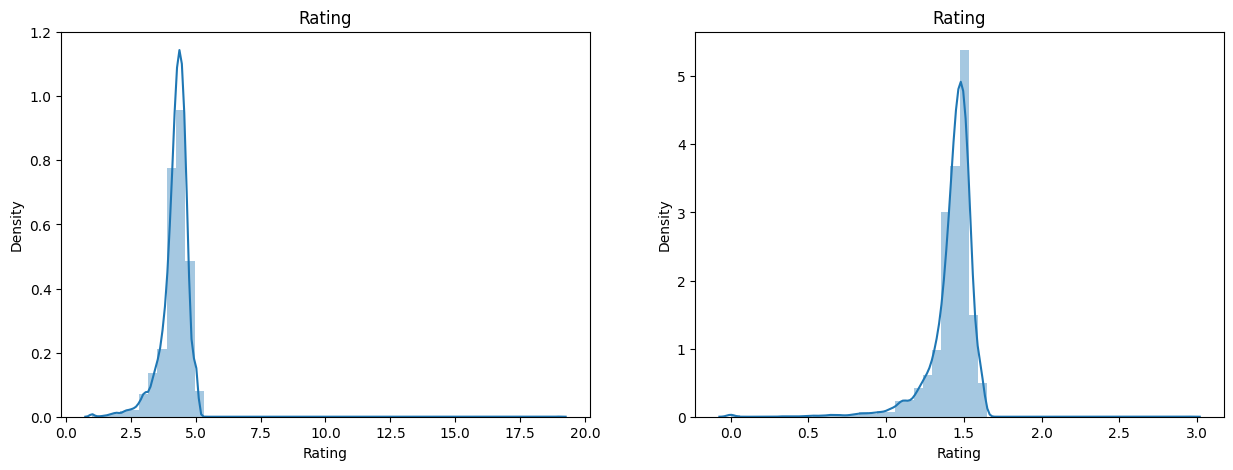

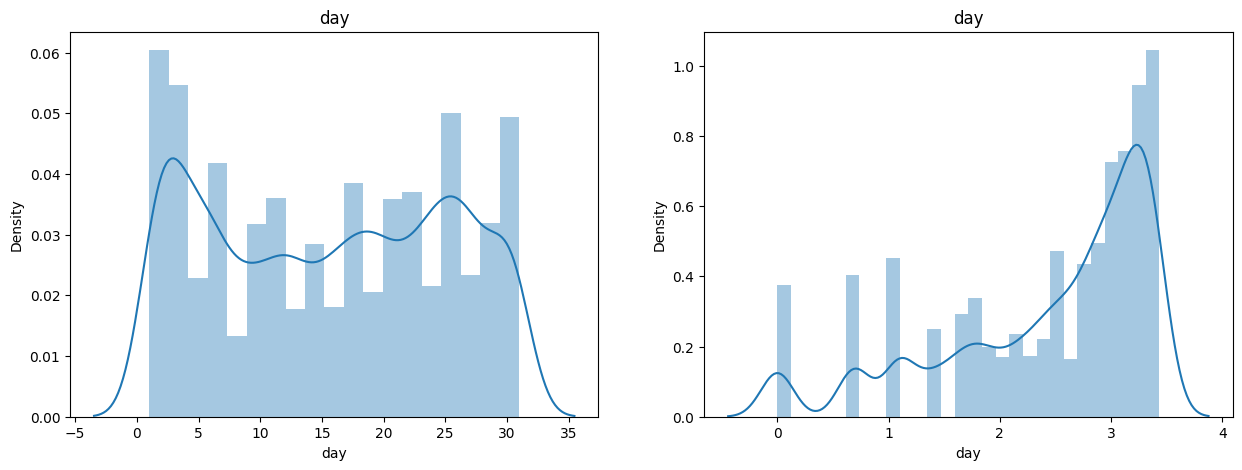

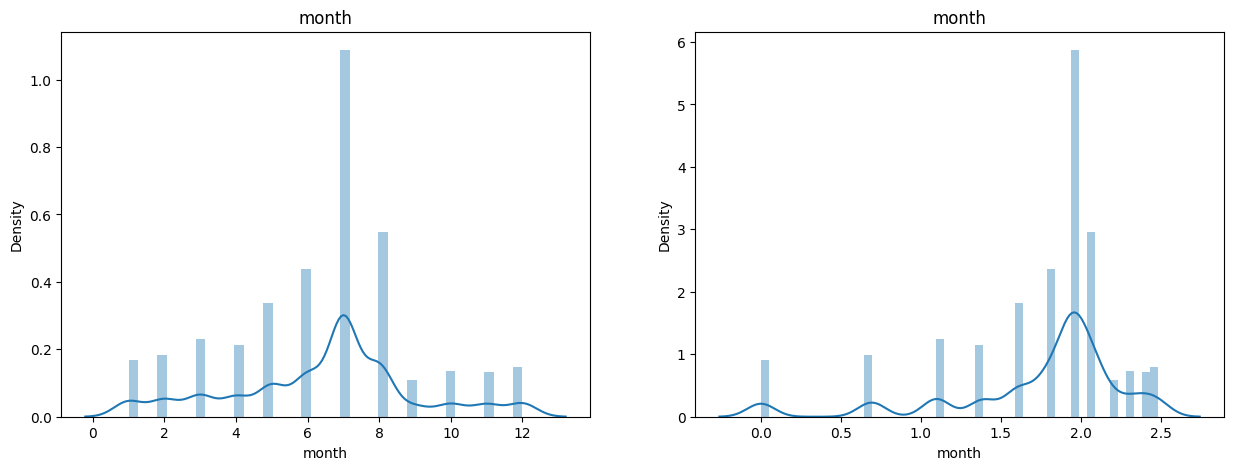

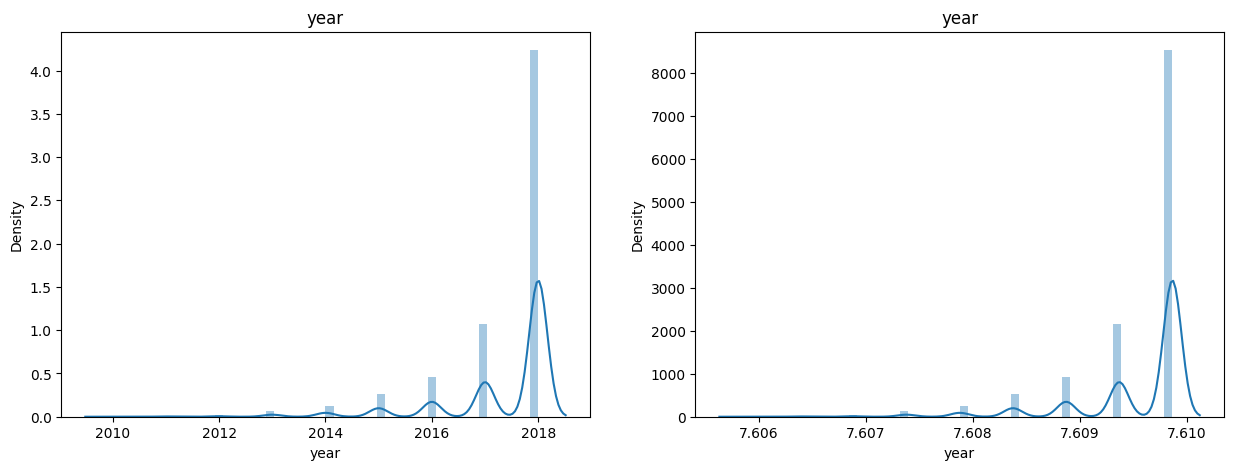

In [15]:
for feature in numerical_features:
    newdata = data_updated.copy()
    if 0 in data_updated[feature].unique():
        pass
    else:
        newdata[feature] = np.log(newdata[feature])
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        sns.distplot(data_updated[feature])
        plt.title(feature)
        plt.subplot(1,2,2)
        sns.distplot(newdata[feature])
        plt.title(feature)
        plt.show()

In [29]:
data_updated[categorical_features].describe().T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Size,10841,462,Varies with device,1695
Type,10840,3,Free,10039
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Current Ver,10833,2832,Varies with device,1459
Android Ver,10838,33,4.1 and up,2451


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=730c9577-57d6-46b8-a5c2-8259fd2fe2f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>